bar plot based of Frequency distribution of desired profession of the students

In [ ]:
age_group_counts = df3["profession"].value_counts()

# Plot a bar diagram
plt.figure(figsize=(22, 15))
age_group_counts.sort_index().plot(kind='bar', color='lightyellow', edgecolor='black')

# Add labels and title
plt.xlabel('Desired profession', fontsize=12)
plt.ylabel('Number of samples', fontsize=12)
plt.title("Distribution of Students' desired profession", fontsize=14)
plt.xticks(rotation=85, fontsize=10)
plt.yticks(fontsize=10)

# Show grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### To examine association between al_media_influence and Degree

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df3['social_media_influence'], df3["Degree "])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Results
#print("Contingency Table:\n", contingency_table)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
#print("Expected Frequencies:\n", expected)

# Interpretation
alpha = 0.05
if p <= alpha:
    print("Reject the null hypothesis: Degree and parents_influence are dependent.")
else:
    print("Fail to reject the null hypothesis: profession chosen and parent's occupation are independent.")

Performing Chi-square test for Indepence b/w 'Degree' and 'parents_influence'

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df3['Degree '], df3['parents_influence'])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Results
#print("Contingency Table:\n", contingency_table)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
#print("Expected Frequencies:\n", expected)

# Interpretation
alpha = 0.05
if p <= alpha:
    print("Reject the null hypothesis: Degree and parents_influence are dependent.")
else:
    print("Fail to reject the null hypothesis: Degree and parents_influence are independent.")

Chi-Square Statistic: 51.26540747974704
p-value: 0.781724470003274
Degrees of Freedom: 60
Fail to reject the null hypothesis: Degree and parents_influence are independent.


### Spearman's rank correlation

In [ ]:
# Spearman's rank correlation
corr, p_value = spearmanr(df3['Financially constrained_coded'].dropna(), df3['profession'].dropna())

print(f"Spearman's Rank Correlation: {corr}")
print(f"P-value: {p_value}")

Spearman's Rank Correlation: -0.17066875718318325
P-value: 0.025193208036230014


In [ ]:
corr, p_value = spearmanr(df3['Financially constrained_coded'], df3['Expected_salary'].fillna(0))

print(f"Spearman's Rank Correlation: {corr}")
print(f"P-value: {p_value}")

Spearman's Rank Correlation: -0.11756062539336253
P-value: 0.12456747013348592


### Trying to Predict CGPA based on Percentage of marks obtained in class 10 and 12 (Linear Regression Approch)

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
X = df3[['Percent_10', 'Percent_12']]
y = df3['CGPA']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model_stats1 = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model_stats1.summary())

                            OLS Regression Results                            
Dep. Variable:                   CGPA   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     10.04
Date:                Fri, 03 Jan 2025   Prob (F-statistic):           7.58e-05
Time:                        18:20:11   Log-Likelihood:                -392.57
No. Observations:                 172   AIC:                             791.1
Df Residuals:                     169   BIC:                             800.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0520      1.986     -0.530      0.5



```


Durbin-Watson Test:
	Hypotheses for the Durbin-Watson Test:
Null Hypothesis (H0): There is no first-order autocorrelation in the residuals (i.e., the residuals are independent).
	•	 H0: ρ = 0  (where  ρ  is the autocorrelation coefficient)
	•	 H0: DW = 2 (Test statistic is equal to 2)
Alternative Hypothesis (Ha): There is first-order autocorrelation in the residuals (i.e., the residuals are correlated).
	•	 Ha: ρ ≠ 0  (where  ρ  is the autocorrelation coefficient)
	•	 Ha: DW ≠ 2 (Test statistic is not equal to 2)


Decision Criteria:
	•	DW Statistic Range: The Durbin-Watson statistic ranges from 0 to 4:
	•	A value close to 2 indicates no autocorrelation.
	•	A value less than 2 indicates positive autocorrelation.
	•	A value greater than 2 indicates negative autocorrelation.
```


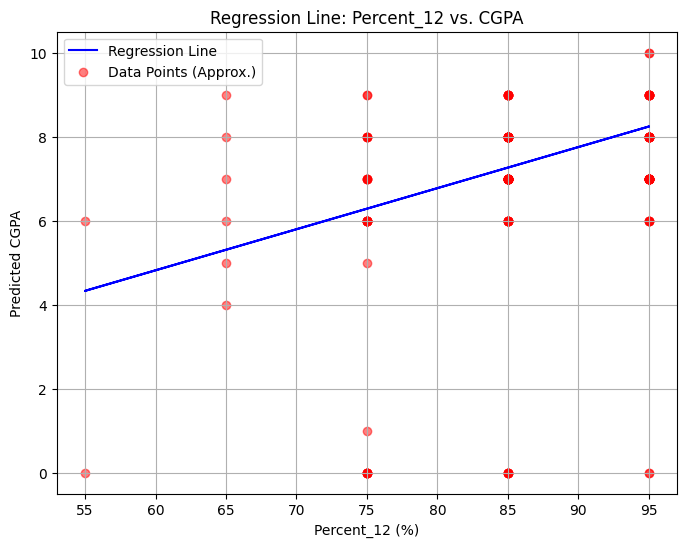

In [ ]:
const = -1.0520
percent_12_coef = 0.0978

# Generate sample Percent_12 values (Assuming range from 60% to 100%)
percent_12_values = df3['Percent_12']

# Calculate corresponding CGPA using the regression equation
cgpa_values = const + percent_12_coef * percent_12_values

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.plot(percent_12_values, cgpa_values, color='blue', label='Regression Line')
plt.scatter(percent_12_values, df3['CGPA'], color='red', alpha=0.5, label='Data Points (Approx.)')
plt.title('Regression Line: Percent_12 vs. CGPA')
plt.xlabel('Percent_12 (%)')
plt.ylabel('Predicted CGPA')
plt.legend()
plt.grid(True)
plt.show()